In [4]:
%matplotlib inline

In [6]:
import matplotlib
import numpy as np  
import pandas as pd
from sklearn import utils
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn import metrics


In [14]:
connection = pg.connect(host="localhost", user="eba", password="ebaeba18", database="eba")

In [39]:
sql_amazon = """
SELECT
  st_x(st_centroid(polys.geom)) AS x,
  st_y(st_centroid(polys.geom)) AS y,
  polys.agblongo_tch_alive,
  polys.evi_max,
  polys.evi_mean,
  polys.evi_median,
  polys.evi_min,
  polys.evi_q1,
  polys.evi_q3,
  polys.evi_sd,
  polys.ndvi_max,
  polys.ndvi_mean,
  polys.ndvi_median,
  polys.ndvi_min,
  polys.ndvi_q1,
  polys.ndvi_q3,
  polys.palsar_hh,
  polys.palsar_hhrhv1,
  polys.palsar_hv,
  polys.trmm_max,
  polys.trmm_median,
  polys.trmm_min,
  polys.trmm_q1,
  polys.trmm_q3
FROM 
  amazon_test polys INNER JOIN transects bb ON ST_Intersects(bb.polyflown, polys.geom)
WHERE 
  polys.evi_max IS NOT NULL AND
  polys.evi_mean IS NOT NULL AND
  polys.evi_median IS NOT NULL AND
  polys.evi_min IS NOT NULL AND
  polys.evi_q1 IS NOT NULL AND
  polys.evi_q3 IS NOT NULL AND
  polys.evi_sd IS NOT NULL AND
  polys.ndvi_max IS NOT NULL AND
  polys.ndvi_mean IS NOT NULL AND
  polys.ndvi_median IS NOT NULL AND
  polys.ndvi_min IS NOT NULL AND
  polys.ndvi_q1 IS NOT NULL AND
  polys.ndvi_q3 IS NOT NULL AND
  polys.palsar_hh IS NOT NULL AND
  polys.palsar_hhrhv1 IS NOT NULL AND
  polys.palsar_hv IS NOT NULL AND
  polys.trmm_max IS NOT NULL AND
  polys.trmm_median IS NOT NULL AND
  polys.trmm_min IS NOT NULL AND
  polys.trmm_q1 IS NOT NULL AND
  polys.trmm_q3 IS NOT NULL;
"""

In [40]:
df = psql.read_sql(sql_amazon, connection)

In [41]:
data = df.copy()

In [42]:
backup_attrs = ["x", "y"]

In [43]:
spatial = data[backup_attrs]

In [44]:
data.drop(backup_attrs, axis=1, inplace=True)

In [45]:
print(data.describe())

       agblongo_tch_alive      evi_max     evi_mean   evi_median      evi_min  \
count         8774.000000  9018.000000  9018.000000  9018.000000  9018.000000   
mean            16.495281  6667.318474  4961.636254  5049.283100  2739.169328   
std              8.378196   875.472260   578.246616   608.312178   834.303749   
min              0.000021  3512.000000  2015.913043  1931.000000   277.000000   
25%             10.891721  6136.250000  4672.923913  4770.000000  2120.000000   
50%             16.585043  6584.500000  5034.413043  5144.000000  2716.000000   
75%             22.304106  7074.000000  5364.956522  5452.000000  3322.000000   
max             54.140940  9996.000000  6317.260870  6330.000000  5283.000000   

            evi_q1       evi_q3       evi_sd     ndvi_max    ndvi_mean  \
count  9018.000000  9018.000000  9018.000000  9018.000000  9018.000000   
mean   4448.895875  5598.947106   965.505662  9166.382346  7795.490526   
std     663.139424   586.999100   226.935074   4

In [46]:
data.loc[(data['agblongo_tch_alive'].isnull()) & (data['agblongo_tch_alive'] < 0), "biomass"] = -1
data.loc[(data['agblongo_tch_alive'] >= 0) & (data['agblongo_tch_alive'] < 5), "biomass"] = 1
data.loc[(data['agblongo_tch_alive'] >= 5) & (data['agblongo_tch_alive'] < 10), "biomass"] = 2
data.loc[(data['agblongo_tch_alive'] >= 10) & (data['agblongo_tch_alive'] < 15), "biomass"] = 3
data.loc[(data['agblongo_tch_alive'] >= 15) & (data['agblongo_tch_alive'] < 20), "biomass"] = 4
data.loc[(data['agblongo_tch_alive'] >= 20) & (data['agblongo_tch_alive'] < 25), "biomass"] = 5
data.loc[(data['agblongo_tch_alive'] >= 25) & (data['agblongo_tch_alive'] < 30), "biomass"] = 6
data.loc[(data['agblongo_tch_alive'] >= 30) & (data['agblongo_tch_alive'] < 35), "biomass"] = 7
data.loc[(data['agblongo_tch_alive'] >= 35) & (data['agblongo_tch_alive'] < 40), "biomass"] = 8
data.loc[(data['agblongo_tch_alive'] >= 40) & (data['agblongo_tch_alive'] < 45), "biomass"] = 9
data.loc[(data['agblongo_tch_alive'] >= 45) & (data['agblongo_tch_alive'] < 50), "biomass"] = 10
data.loc[(data['agblongo_tch_alive'] >= 50) & (data['agblongo_tch_alive'] < 60), "biomass"] = 11
data.loc[(data['agblongo_tch_alive'] >= 60) & (data['agblongo_tch_alive'] < 80), "biomass"] = 12
data.loc[data['agblongo_tch_alive'] >= 80, "biomass"] = 13

In [47]:
target = data["biomass"]

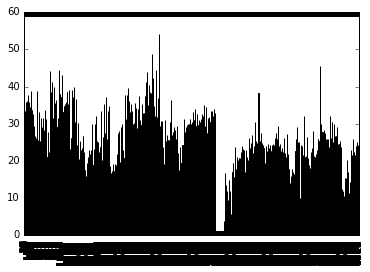

In [48]:
data.agblongo_tch_alive.plot(kind='bar')

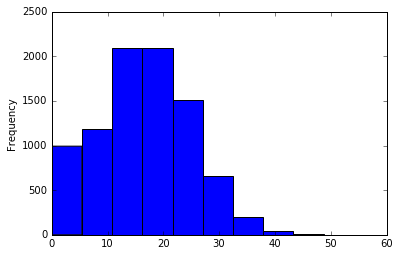

In [49]:
data.agblongo_tch_alive.plot.hist()

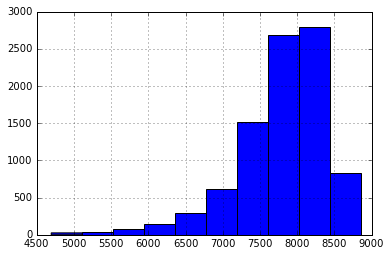

In [50]:
data.ndvi_mean.hist()

In [51]:
print(data.agblongo_tch_alive.describe())

count    8774.000000
mean       16.495281
std         8.378196
min         0.000021
25%        10.891721
50%        16.585043
75%        22.304106
max        54.140940
Name: agblongo_tch_alive, dtype: float64


In [52]:
print(target.describe())

count    8774.000000
mean        3.815364
std         1.663087
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        11.000000
Name: biomass, dtype: float64


In [ ]:
data.drop(["agblongo_tch_alive", "biomass"], axis=1, inplace=True)

In [29]:
for col in data.columns:
    df = data[col]
    data[col] = (df - df.min()) / (df.max() - df.min())

In [37]:
print(target.describe())

count    9018.000000
mean       11.648259
std         2.109361
min        -1.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: biomass, dtype: float64


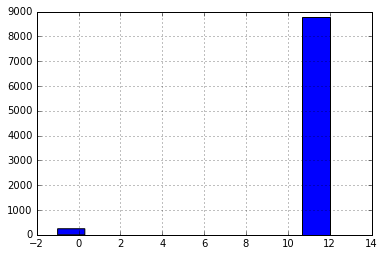

In [38]:
target.hist()

In [33]:
print("outliers.shape: {}, target.shape: {}".format(outliers.shape, target.shape))

outliers.shape: (0L,), target.shape: (9018L,)
